In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import scipy.stats
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [3]:
ratings_url=r'C:\Users\Intel\Desktop\Python\pythonBasic\Data Science and Statics\Data Science course\datasets\beauty_evaluation.csv'
df=pd.read_csv(ratings_url)


In [4]:
df.head() #checking top 5 rows

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [5]:
df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.270194e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

In [7]:
df.shape

(463, 19)

In [68]:
df.isnull().sum()

minority           0
age                0
gender             0
credits            0
beauty             0
eval               0
division           0
native             0
tenure             0
students           0
allstudents        0
prof               0
PrimaryLast        0
vismin             0
female             0
single_credit      0
upper_division     0
English_speaker    0
tenured_prof       0
age_group          0
dtype: int64

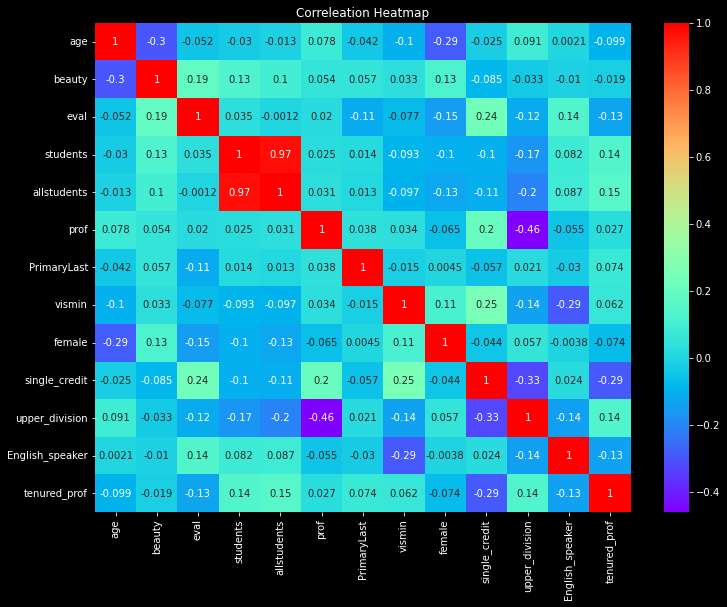

In [67]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, cmap = "rainbow")
plt.title("Correleation Heatmap")
plt.show()


<AxesSubplot:xlabel='beauty'>

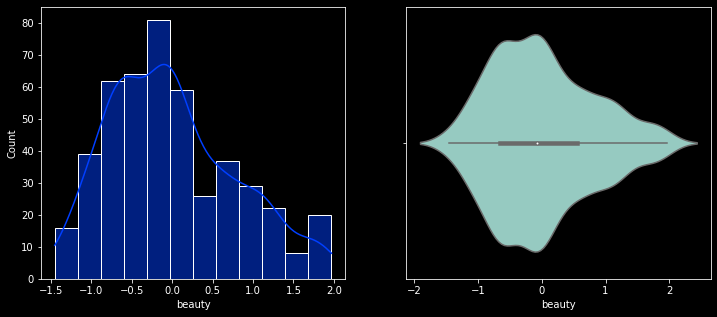

In [8]:
#How the beauty data is distributed
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['beauty'],kde=True)

plt.subplot(1,2,2)
sns.violinplot(df['beauty'])

<AxesSubplot:xlabel='eval'>

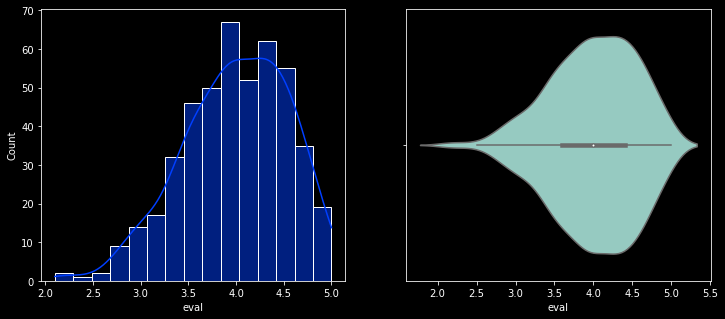

In [9]:
#how the Evaluation data is distributed

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['eval'],kde=True)

plt.subplot(1,2,2)
sns.violinplot(df['eval'])

Text(0.5, 1.0, 'Evaluation score of gender with respect tenured prof')

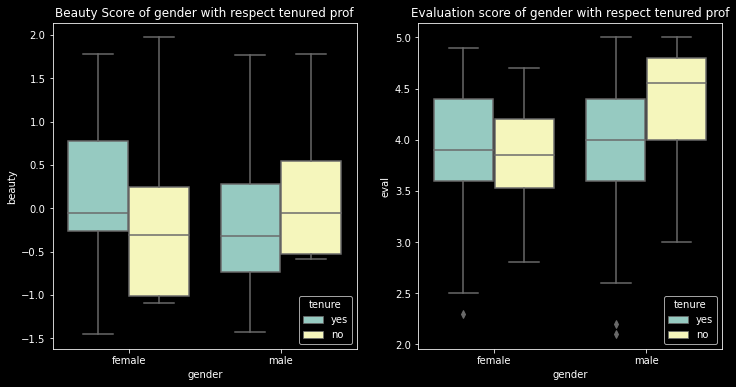

In [10]:
#Beauty Score and Beauty Score of gender with respect tenured profof gender with respect tenured prof

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x=df['gender'],y=df['beauty'],hue=df['tenure'])
plt.title("Beauty Score of gender with respect tenured prof")


plt.subplot(1,2,2)
sns.boxplot(x=df['gender'],y=df['eval'],hue=df['tenure'])
plt.title("Evaluation score of gender with respect tenured prof")


<AxesSubplot:xlabel='age', ylabel='Count'>

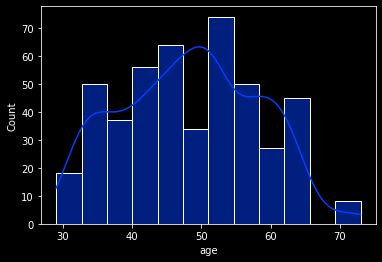

In [17]:
sns.histplot(df['age'],kde=True) # how the age is distributed

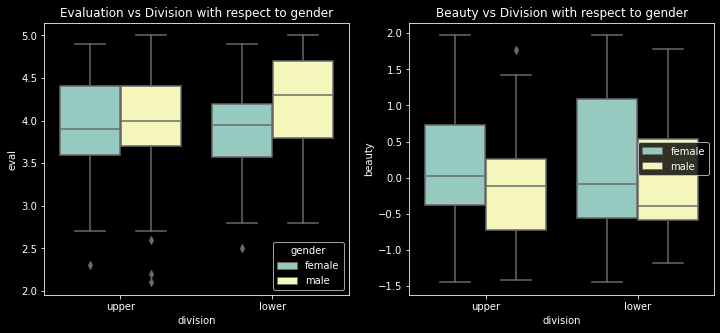

In [66]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df,x=df['division'],y=df['eval'],hue=df['gender'])
plt.title('Evaluation vs Division with respect to gender')

plt.subplot(1,2,2)
sns.boxplot(data=df,x=df['division'],y=df['beauty'],hue=df['gender'])
plt.title('Beauty vs Division with respect to gender')
plt.legend(loc='best')
plt.show()

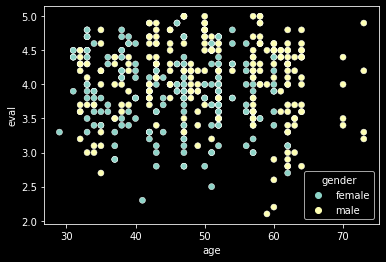

In [27]:
ax = sns.scatterplot(x='age', y='eval', hue='gender',data=df)


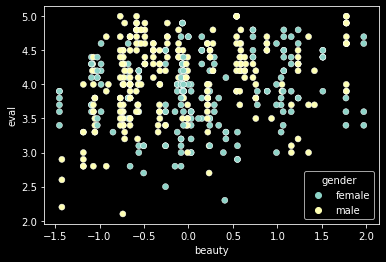

In [28]:
ax = sns.scatterplot(x='beauty', y='eval', hue='gender',data=df)


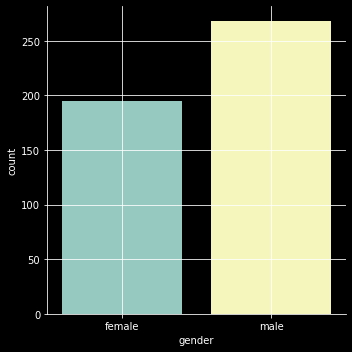

In [29]:
#No of courses taught by gender
sns.catplot(data=df,x='gender',kind='count')
plt.grid(True)

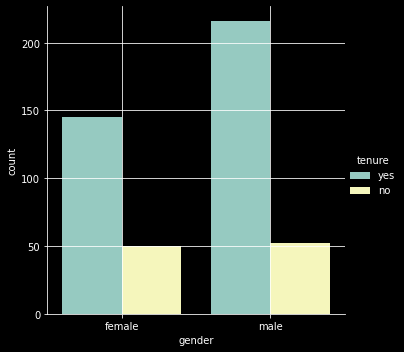

In [30]:
sns.catplot(data=df,x='gender',kind='count',hue='tenure')
plt.grid(True)

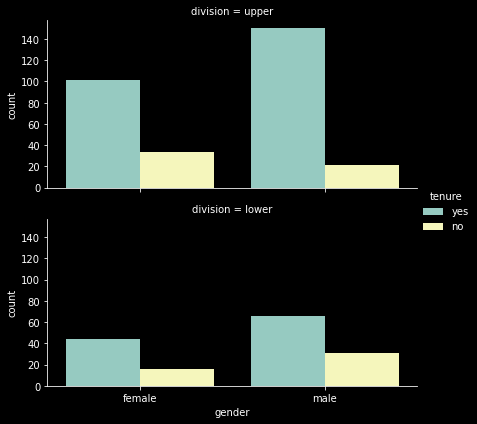

In [31]:
sns.catplot(x='gender', hue = 'tenure', row = 'division',
            kind='count', data=df,
            height = 3, aspect = 2)

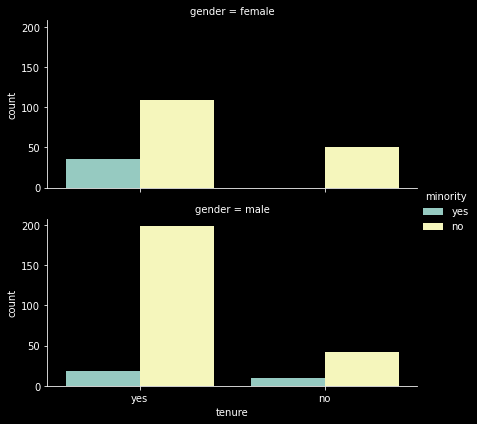

In [32]:
sns.catplot(x='tenure',hue='minority',row='gender',kind='count',data=df,height=3,aspect=2)

In [11]:
#checking relationship between gender and beauty score

df.groupby('gender').agg({'beauty':['mean','std','var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

In [12]:
#counting total number of tenured prof with respect with gender
tenured_prof=df[df.tenure=='yes'].groupby('gender').agg({'tenure':'count'}).reset_index()
tenured_prof

,gender,tenure
0,female,145
1,male,216


In [13]:
#calculating percentage of tenured prof are male and female
tenured_prof['percentage']=tenured_prof.tenure*100/tenured_prof.tenure.sum()
tenured_prof

,gender,tenure,percentage
0,female,145,40.166205
1,male,216,59.833795


In [14]:
#checking relationship between minority people and tenured people
visible_minority=df[df.tenure=='yes'].groupby('minority').agg({'tenure':'count'}).reset_index()
visible_minority

,minority,tenure
0,no,307
1,yes,54


In [15]:
#calculating percentage of tenured prof which are minor or not
visible_minority['percentage']=visible_minority.tenure*100/visible_minority.tenure.sum()
visible_minority

,minority,tenure,percentage
0,no,307,85.041551
1,yes,54,14.958449


In [16]:
#calculating mean and std of tenured and untenured prof
df.groupby('tenure').agg({'age':['mean','std']}).reset_index()

tenure        age           
               mean        std
0     no  50.186275   6.946372
1    yes  47.850416  10.420056

In [18]:
#Evaluation score of male and female which are tenured and untenured
df.groupby(['tenure','gender'])['eval'].mean().reset_index()


,tenure,gender,eval
0,no,female,3.860000
1,no,male,4.396154
2,yes,female,3.915172
3,yes,male,3.990278


In [19]:
df['age'].mean() # mean of all population age

48.365010799136066

In [20]:
df['age'].std() # std of all population age

9.802742037864821

In [21]:
#  it we set only unique professor age(i.e we are taking sample ) 
no_duplicates_df = df.drop_duplicates(subset =['prof'])
(no_duplicates_df.head())

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


In [22]:
# checking this sample mean std and corelated with population age mean and std
no_duplicates_df['age'].mean()

47.5531914893617

In [23]:
no_duplicates_df['age'].std()

10.25651329515495

In [24]:
df.groupby(['division','gender',])['eval'].mean().reset_index()

,division,gender,eval
0,lower,female,3.881667
1,lower,male,4.214433
2,upper,female,3.909630
3,upper,male,3.986550


In [33]:
df.groupby(['tenure','minority']).agg({'gender':'count'}).reset_index()

,tenure,minority,gender
0,no,no,92
1,no,yes,10
2,yes,no,307
3,yes,yes,54


### Using the teachers' rating dataset, what is the probability of receiving an evaluation score of greater than 4.5

In [34]:
eval_mean=round(df['eval'].mean(),3)
eval_std=round(df['eval'].std(),3)
print(eval_mean,eval_std)

3.998 0.555


In [35]:
prob0 = scipy.stats.norm.cdf((4.5 - eval_mean)/eval_std) #()
print((1-prob0)*100)

18.28639734596742


### Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.5 and less than 4.2

In [36]:
prob1=scipy.stats.norm.cdf((3.5-eval_mean)/eval_std)
prob1=((prob1)*100)
print(prob1)
print()

prob2=scipy.stats.norm.cdf((4.2-eval_mean)/eval_std)
print(prob2*100)
print()
print((prob2*100)-prob1)

18.478014914436542

64.2057540461896

45.727739131753054


### Using the teachers' rating dataset, what is the probability of receiving an evaluation score greater than 3.3?

In [37]:
prob4=scipy.stats.norm.cdf((3.3-eval_mean)/eval_std)
print((1-prob4)*100)

89.57422041794155


### Using the teachers' rating dataset, what is the probability of receiving an evaluation score between 2 and 3?

In [38]:
prob1=scipy.stats.norm.cdf((2-eval_mean)/eval_std)

prob2=scipy.stats.norm.cdf((3-eval_mean)/eval_std)

print((prob2-prob1)*100)

3.5913693912466056


### T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

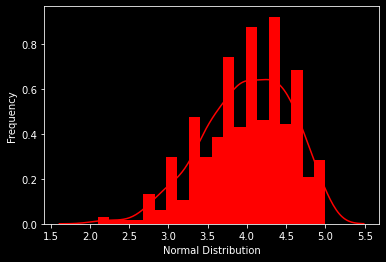

In [39]:
ax = sns.distplot(df['eval'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

## Levene Test

Three variations of Levene's test are possible.  The possibilities
and their recommended usages are:

  * 'median' : Recommended for skewed (non-normal) distributions>
  * 'mean' : Recommended for symmetric, moderate-tailed distributions.
  * 'trimmed' : Recommended for heavy-tailed distributions.

In [40]:
#Now we want to check whether male and female evaluation score is same or not using leavane test
#The small p-value suggests that the populations do not have equal variances.

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


In [41]:
df_eval=df.groupby('gender')['eval'].var().reset_index()
df_eval

,gender,eval
0,female,0.290308
1,male,0.309861


In [42]:
scipy.stats.levene(df[df['gender']=='male']['eval'],
                   df[df['gender']=='female']['eval'],center='mean')

LeveneResult(statistic=0.1903292244483306, pvalue=0.6628469835452313)

In [43]:
#if there is any difference in variance of evaluation  between division 
df.groupby('division')['eval'].mean().reset_index()

,division,eval
0,lower,4.087261
1,upper,3.952614


In [44]:
scipy.stats.levene(df[df['division']=='upper']['eval'],
                   df[df['division']=='lower']['eval'],center='mean')

LeveneResult(statistic=3.601256985480279, pvalue=0.058360381309125346)

In [45]:
df['English_speaker'].value_counts()

1    435
0     28
Name: English_speaker, dtype: int64

In [46]:
#is there is any diffenece
df.groupby('English_speaker')['eval'].var().reset_index()

,English_speaker,eval
0,0,0.226177
1,1,0.307112


In [47]:
scipy.stats.levene(df[df['English_speaker']==1]['eval'],
                   df[df['English_speaker']==0]['eval'],center='mean')

LeveneResult(statistic=0.699188908460778, pvalue=0.4034895640915024)

## T -Test 

In [48]:
#The T-test Calculate the T-test for the means of *two independent* samples of scores.
#This test assumes that the populations have identical variances by default.if not then make equal_var=False by default=True

#The t-test quantifies the difference between the arithmetic means of the two samples. The p-value quantifies the 
#probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from
#populations with the same population means, is true. A p-value larger than a chosen threshold (e.g. 5% or 1%) indicates 
#that our observation is not so unlikely to have occurred by chance. Therefore, we do not reject the null hypothesis 
#of equal population means.If the p-value is smaller than our threshold, then we have evidence
#against the null hypothesis of equal population means. 

In [49]:
df_eval=df.groupby('gender')['eval'].mean().reset_index()
df_eval

,gender,eval
0,female,3.901026
1,male,4.069030


In [50]:
scipy.stats.ttest_ind(df[df['gender'] == 'female']['eval'],
                   df[df['gender'] == 'male']['eval'], equal_var = True)

Ttest_indResult(statistic=-3.2499379438310383, pvalue=0.0012387609435887507)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in teaching evaluations based on gender


### ANOVA: Using the teachers' rating data set, does beauty score for instructors differ by age?

First, we group the data into cateries as the one-way ANOVA can't work with continuous variable - using the example from the video, we will create a new column for this newly assigned group our categories will be teachers that are:

*   40 years and younger
*   between 40 and 57 years
*   57 years and older


In [51]:
df.loc[(df['age'] <= 40), 'age_group'] = '40 years and younger'
df.loc[(df['age'] > 40)&(df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
df.loc[(df['age'] >= 57), 'age_group'] = '57 years and older'

In [52]:
scipy.stats.levene(df[df['age_group'] == '40 years and younger']['beauty'],
                   df[df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   df[df['age_group'] == '57 years and older']['beauty'], 
                   center='mean')
# since the p-value is less than 0.05, the variance are not equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=8.600056686290117, pvalue=0.00021536618050263845)

First, separate the three samples (one for each job category) into a variable each.

In [53]:
forty_lower = df[df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = df[df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = df[df['age_group'] == '57 years and older']['beauty']

Now, run a one-way ANOVA.

In [54]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 17.597558623753343, P-Value: 4.32254893044564e-08


### ANOVA: Using the teachers' rating data set, does teaching evaluation score for instructors differ by age?

In [55]:
scipy.stats.levene(df[df['age_group'] == '40 years and younger']['eval'],
                   df[df['age_group'] == 'between 40 and 57 years']['eval'], 
                   df[df['age_group'] == '57 years and older']['eval'], 
                   center='mean')
#here p value is greater than 0.05, the variance are equal 

LeveneResult(statistic=3.8202376578233426, pvalue=0.022621418601902407)

In [56]:
forty_lower = df[df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven = df[df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older = df[df['age_group'] == '57 years and older']['eval']

In [57]:
f_statistics,p_value=scipy.stats.f_oneway(forty_lower,forty_fiftyseven,fiftyseven_older)
print("F_statistics : {0} , P-value : {1} ".format(f_statistics,p_value))

F_statistics : 1.2226327990202404 , P-value : 0.29540894244136096 


**Conclusion:** Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as there is no significant evidence that at least one of the means differ.


### Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?


State the hypothesis:

*   $H\_0:$ The proportion of teachers who are tenured is independent of gender
*   $H\_1:$ The proportion of teachers who are tenured is associated with gender


In [58]:
cont_table  = pd.crosstab(df['tenure'], df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [59]:
scipy.stats.chi2_contingency(cont_table,correction=True)

(2.20678166999886,
 0.1374050603563787,
 1,
 array([[ 42.95896328,  59.04103672],
        [152.04103672, 208.95896328]]))

In [60]:
cont_table  = pd.crosstab(df['beauty'], df['gender'])


In [61]:
scipy.stats.chi2_contingency(cont_table,correction=True)
#though this we can say that there is associationg between beauty and gender

(463.0,
 1.715385728499893e-50,
 93,
 array([[2.52699784, 3.47300216],
        [1.26349892, 1.73650108],
        [2.94816415, 4.05183585],
        [2.94816415, 4.05183585],
        [1.26349892, 1.73650108],
        [2.52699784, 3.47300216],
        [3.36933045, 4.63066955],
        [2.52699784, 3.47300216],
        [2.10583153, 2.89416847],
        [1.26349892, 1.73650108],
        [0.42116631, 0.57883369],
        [0.42116631, 0.57883369],
        [4.63282937, 6.36717063],
        [1.26349892, 1.73650108],
        [1.26349892, 1.73650108],
        [2.10583153, 2.89416847],
        [1.68466523, 2.31533477],
        [1.26349892, 1.73650108],
        [1.68466523, 2.31533477],
        [3.36933045, 4.63066955],
        [5.47516199, 7.52483801],
        [2.94816415, 4.05183585],
        [0.84233261, 1.15766739],
        [4.21166307, 5.78833693],
        [0.84233261, 1.15766739],
        [1.68466523, 2.31533477],
        [4.21166307, 5.78833693],
        [1.68466523, 2.31533477],
        [1.

In [62]:
cont_table=pd.crosstab(df['eval'],df['beauty'])

In [63]:
scipy.stats.chi2_contingency(cont_table,correction=True)
#though this we can say that there is associationg between beauty and eval score

(3694.7830654556737,
 2.4804742356800257e-41,
 2604,
 array([[0.01295896, 0.00647948, 0.01511879, ..., 0.01727862, 0.00431965,
         0.00863931],
        [0.01295896, 0.00647948, 0.01511879, ..., 0.01727862, 0.00431965,
         0.00863931],
        [0.01295896, 0.00647948, 0.01511879, ..., 0.01727862, 0.00431965,
         0.00863931],
        ...,
        [0.18142549, 0.09071274, 0.21166307, ..., 0.24190065, 0.06047516,
         0.12095032],
        [0.1425486 , 0.0712743 , 0.1663067 , ..., 0.19006479, 0.0475162 ,
         0.0950324 ],
        [0.10367171, 0.05183585, 0.12095032, ..., 0.13822894, 0.03455724,
         0.06911447]]))